In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import uproot

In [2]:
import pandas as pd

In [3]:
hh = uproot.open("/gpfs/slac/atlas/fs1/d/rafaeltl/public/L1BTag/FTAGntups/user.rateixei.450000.aMcAtNloHerwig7EvtGen_UEEE5_CTEQ6L1_CT10ME_hh_bbbb.recon.FTAGntupl.29Apr2020slc6_Akt4EMTo/user.rateixei.21162715.Akt4EMTo.root")
thh = hh['bTag_AntiKt4EMTopoJets'].arrays()

In [5]:
jarrs = [b'jet_pt', b'jet_eta', b'jet_phi', b'jet_E', b'jet_m', b'jet_nConst', b'jet_dRiso', b'jet_LabDr_HadF', b'jet_aliveAfterOR', b'jet_aliveAfterORmu']

In [6]:
p_hh = {}

hh_nentries = thh[b'jet_pt'].shape[0]

for jar in jarrs:
    this_jar = str(jar, 'utf-8')
    p_hh[this_jar] = -99*np.ones( (hh_nentries,10) )

for i in range(0, hh_nentries):
    njets = thh[b'jet_pt'][i].shape[0]
    min_jets = min(10, njets)
    
    for jar in jarrs:
        this_jar = str(jar, 'utf-8')
        p_hh[this_jar][i, :min_jets] = thh[jar][i, :min_jets]

In [7]:
jz0_xs = 79310000*0.96937/(995000.)

In [8]:
jz0 = uproot.open("/gpfs/slac/atlas/fs1/d/rafaeltl/public/L1BTag/FTAGntups/QCD/JZ0W.root")

In [9]:
tjz0 = jz0['bTag_AntiKt4EMTopoJets'].arrays()

In [10]:
p_jz0 = {}

jz0_nentries = tjz0[b'jet_pt'].shape[0]

for jar in jarrs:
    this_jar = str(jar, 'utf-8')
    p_jz0[this_jar] = -99*np.ones( (jz0_nentries, 10) )

for i in range(0, jz0_nentries):
    njets = tjz0[b'jet_pt'][i].shape[0]
    min_jets = min(10, njets)   
        
    for jar in jarrs:
        this_jar = str(jar, 'utf-8')
        p_jz0[this_jar][i, :min_jets] = tjz0[jar][i, :min_jets]

In [11]:
import uproot_methods as um

In [12]:
hh_4jets = []
jz0_4jets = []

for ij in range(0,4):
    this_hh = um.TLorentzVectorArray.from_ptetaphie(p_hh['jet_pt'][:,ij]*1e-3, 
                                           p_hh['jet_eta'][:,ij], 
                                           p_hh['jet_phi'][:,ij], 
                                           p_hh['jet_E'][:,ij]*1e-3)
    
    hh_4jets.append(this_hh)
    
    this_jz0 = um.TLorentzVectorArray.from_ptetaphie(p_jz0['jet_pt'][:,ij]*1e-3, 
                                           p_jz0['jet_eta'][:,ij], 
                                           p_jz0['jet_phi'][:,ij], 
                                           p_jz0['jet_E'][:,ij]*1e-3)
    
    jz0_4jets.append(this_jz0)

In [13]:
hh_4j = hh_4jets[0] + hh_4jets[1] + hh_4jets[2] + hh_4jets[3]

In [14]:
jz0_4j = jz0_4jets[0] + jz0_4jets[1] + jz0_4jets[2] + jz0_4jets[3]

In [15]:
hh_ht = hh_4jets[0].pt + hh_4jets[1].pt + hh_4jets[2].pt + hh_4jets[3].pt

In [16]:
jz0_ht = jz0_4jets[0].pt + jz0_4jets[1].pt + jz0_4jets[2].pt + jz0_4jets[3].pt

In [17]:
hh_n_central_jets = 1.0*( ( hh_4jets[0].pt > 20) & (np.abs(hh_4jets[0].eta) < 2.5) )  + \
                    1.0*( ( hh_4jets[1].pt > 20) & (np.abs(hh_4jets[1].eta) < 2.5) )  + \
                    1.0*( ( hh_4jets[2].pt > 20) & (np.abs(hh_4jets[2].eta) < 2.5) )  + \
                    1.0*( ( hh_4jets[3].pt > 20) & (np.abs(hh_4jets[3].eta) < 2.5) ) 

In [18]:
jz0_n_central_jets = 1.0*( ( jz0_4jets[0].pt > 20) & (np.abs(jz0_4jets[0].eta) < 2.5) )  + \
                     1.0*( ( jz0_4jets[1].pt > 20) & (np.abs(jz0_4jets[1].eta) < 2.5) )  + \
                     1.0*( ( jz0_4jets[2].pt > 20) & (np.abs(jz0_4jets[2].eta) < 2.5) )  + \
                     1.0*( ( jz0_4jets[3].pt > 20) & (np.abs(jz0_4jets[3].eta) < 2.5) ) 

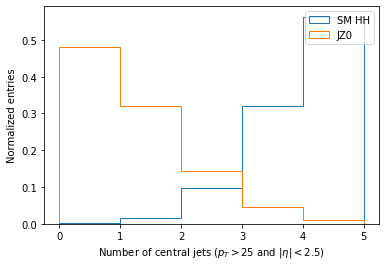

In [19]:
plt.Figure()
plt.hist(hh_n_central_jets, histtype='step', bins=5, range=(0,5), density=1, label='SM HH')
plt.hist(jz0_n_central_jets, histtype='step', bins=5, range=(0,5), density=1, weights=tjz0[b'mcwg'], label='JZ0')
plt.xlabel(r'Number of central jets ($p_T > 25$ and $|\eta| < 2.5$)')
plt.ylabel('Normalized entries')
plt.legend()
plt.show()

In [20]:
def sel_base(tp, pt, ncnt):
    if tp == 'hh':
        jts = hh_4jets
        ncentr = hh_n_central_jets
    elif tp == 'jz0':
        jts = jz0_4jets
        ncentr = jz0_n_central_jets
    return (
       ( jts[0].pt > pt ) & 
       ( jts[1].pt > pt ) & 
       ( jts[2].pt > pt ) & 
       ( jts[3].pt > pt ) & 
       ( ncentr > ncnt )
    )

In [21]:
minjetpt = 20

/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))
/opt/rh/rh-python36/root/usr/lib/python3.6/site-packages/uproot_methods/classes/TLorentzVector.py:189: RuntimeWarning: invalid value encountered in sqrt
  return self._trymemo("mass", lambda self: self.awkward.numpy.sqrt(self.mag2))


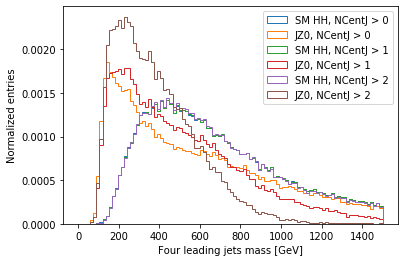

In [22]:
plt.Figure()
plt.hist(hh_4j.mass[sel_base('hh', minjetpt, 0)], histtype='step', bins=100, range=(0,1500), density=1, label='SM HH, NCentJ > 0')
plt.hist(jz0_4j.mass[sel_base('jz0', minjetpt, 0)], histtype='step', bins=100, range=(0,1500), density=1, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 0)], label='JZ0, NCentJ > 0')

plt.hist(hh_4j.mass[sel_base('hh', minjetpt, 1)], histtype='step', bins=100, range=(0,1500), density=1, label='SM HH, NCentJ > 1')
plt.hist(jz0_4j.mass[sel_base('jz0', minjetpt, 1)], histtype='step', bins=100, range=(0,1500), density=1, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 1)], label='JZ0, NCentJ > 1')

plt.hist(hh_4j.mass[sel_base('hh', minjetpt, 2)], histtype='step', bins=100, range=(0,1500), density=1, label='SM HH, NCentJ > 2')
plt.hist(jz0_4j.mass[sel_base('jz0', minjetpt, 2)], histtype='step', bins=100, range=(0,1500), density=1, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 2)], label='JZ0, NCentJ > 2')


plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Normalized entries')
plt.legend()
plt.show()

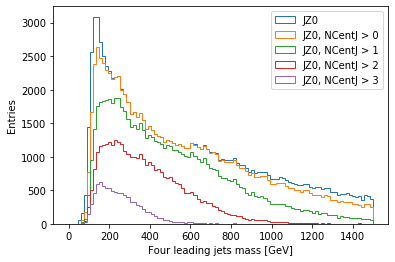

In [23]:
plt.Figure()

plt.hist(jz0_4j.mass[sel_base('jz0', minjetpt, -1)], histtype='step', bins=100, range=(0,1500), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, -1)], label='JZ0')

plt.hist(jz0_4j.mass[sel_base('jz0', minjetpt, 0)], histtype='step', bins=100, range=(0,1500), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 0)], label='JZ0, NCentJ > 0')

plt.hist(jz0_4j.mass[sel_base('jz0', minjetpt, 1)], histtype='step', bins=100, range=(0,1500), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 1)], label='JZ0, NCentJ > 1')

plt.hist(jz0_4j.mass[sel_base('jz0', minjetpt, 2)], histtype='step', bins=100, range=(0,1500), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 2)], label='JZ0, NCentJ > 2')

plt.hist(jz0_4j.mass[sel_base('jz0', minjetpt, 3)], histtype='step', bins=100, range=(0,1500), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 3)], label='JZ0, NCentJ > 3')


plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()

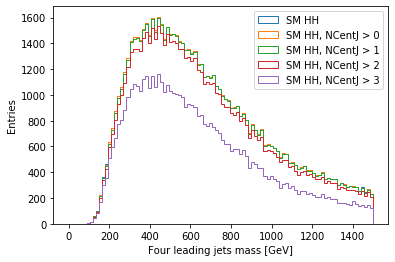

In [24]:
plt.Figure()

plt.hist(hh_4j.mass[sel_base('hh', minjetpt, -1)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH')

plt.hist(hh_4j.mass[sel_base('hh', minjetpt, 0)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 0')

plt.hist(hh_4j.mass[sel_base('hh', minjetpt, 1)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 1')

plt.hist(hh_4j.mass[sel_base('hh', minjetpt, 2)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 2')

plt.hist(hh_4j.mass[sel_base('hh', minjetpt, 3)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 3')


plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()

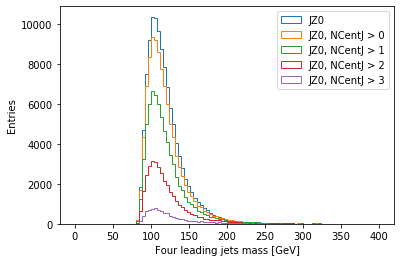

In [25]:
plt.Figure()

plt.hist(jz0_ht[sel_base('jz0', minjetpt, -1)], histtype='step', bins=100, range=(0,400), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, -1)], label='JZ0')

plt.hist(jz0_ht[sel_base('jz0', minjetpt, 0)], histtype='step', bins=100, range=(0,400), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 0)], label='JZ0, NCentJ > 0')

plt.hist(jz0_ht[sel_base('jz0', minjetpt, 1)], histtype='step', bins=100, range=(0,400), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 1)], label='JZ0, NCentJ > 1')

plt.hist(jz0_ht[sel_base('jz0', minjetpt, 2)], histtype='step', bins=100, range=(0,400), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 2)], label='JZ0, NCentJ > 2')

plt.hist(jz0_ht[sel_base('jz0', minjetpt, 3)], histtype='step', bins=100, range=(0,400), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 3)], label='JZ0, NCentJ > 3')


plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()

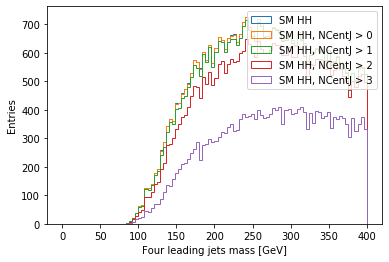

In [26]:
plt.Figure()

plt.hist(hh_ht[sel_base('hh', minjetpt, -1)], histtype='step', bins=100, range=(0,400), density=0, label='SM HH')

plt.hist(hh_ht[sel_base('hh', minjetpt, 0)], histtype='step', bins=100, range=(0,400), density=0, label='SM HH, NCentJ > 0')

plt.hist(hh_ht[sel_base('hh', minjetpt, 1)], histtype='step', bins=100, range=(0,400), density=0, label='SM HH, NCentJ > 1')

plt.hist(hh_ht[sel_base('hh', minjetpt, 2)], histtype='step', bins=100, range=(0,400), density=0, label='SM HH, NCentJ > 2')

plt.hist(hh_ht[sel_base('hh', minjetpt, 3)], histtype='step', bins=100, range=(0,400), density=0, label='SM HH, NCentJ > 3')

plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()

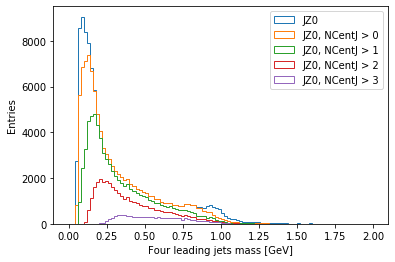

In [27]:
plt.Figure()

plt.hist((jz0_ht/jz0_4j.mass)[sel_base('jz0', minjetpt, -1)], histtype='step', bins=100, range=(0,2), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, -1)], label='JZ0')

plt.hist((jz0_ht/jz0_4j.mass)[sel_base('jz0', minjetpt, 0)], histtype='step', bins=100, range=(0,2), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 0)], label='JZ0, NCentJ > 0')

plt.hist((jz0_ht/jz0_4j.mass)[sel_base('jz0', minjetpt, 1)], histtype='step', bins=100, range=(0,2), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 1)], label='JZ0, NCentJ > 1')

plt.hist((jz0_ht/jz0_4j.mass)[sel_base('jz0', minjetpt, 2)], histtype='step', bins=100, range=(0,2), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 2)], label='JZ0, NCentJ > 2')

plt.hist((jz0_ht/jz0_4j.mass)[sel_base('jz0', minjetpt, 3)], histtype='step', bins=100, range=(0,2), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 3)], label='JZ0, NCentJ > 3')


plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()

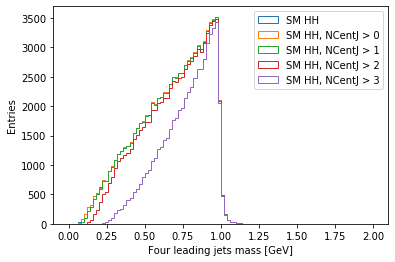

In [28]:
plt.Figure()

plt.hist((hh_ht/hh_4j.mass)[sel_base('hh', minjetpt, -1)], histtype='step', bins=100, range=(0,2), density=0, label='SM HH')

plt.hist((hh_ht/hh_4j.mass)[sel_base('hh', minjetpt, 0)], histtype='step', bins=100, range=(0,2), density=0, label='SM HH, NCentJ > 0')

plt.hist((hh_ht/hh_4j.mass)[sel_base('hh', minjetpt, 1)], histtype='step', bins=100, range=(0,2), density=0, label='SM HH, NCentJ > 1')

plt.hist((hh_ht/hh_4j.mass)[sel_base('hh', minjetpt, 2)], histtype='step', bins=100, range=(0,2), density=0, label='SM HH, NCentJ > 2')

plt.hist((hh_ht/hh_4j.mass)[sel_base('hh', minjetpt, 3)], histtype='step', bins=100, range=(0,2), density=0, label='SM HH, NCentJ > 3')


plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()

In [29]:
def calc_eff(arr, bins, range, sel, is_sig=False):
    
    if is_sig:
        hh_nosel = np.histogram(arr[sel_base('hh', minjetpt, 3)], bins=bins, range=range)
        
        hh = np.histogram(arr[sel], bins=bins, range=range)
    else:
        hh_nosel = np.histogram(arr[sel_base('jz0', minjetpt, 3)], bins=bins, range=range, weights=tjz0[b'mcwg'][sel_base('jz0', minjetpt, 3)]*jz0_xs)
    
        hh = np.histogram(arr[sel], bins=bins, range=range, weights=tjz0[b'mcwg'][sel]*jz0_xs)
    
    cumulative = np.cumsum(hh[0][::-1])[::-1]/np.sum(hh_nosel[0])
    
    pl_bins = 0.5*(hh[1][:-1] + hh[1][1:])
    
    return (pl_bins, cumulative)

In [30]:
rate_j0_cent0 = calc_eff( (jz0_4jets[0].pt), bins=1000, range=(10, 1000),
    sel=sel_base('jz0', minjetpt, -1) )

rate_j1_cent0 = calc_eff( (jz0_4jets[1].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, -1) )

rate_j2_cent0 = calc_eff( (jz0_4jets[2].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, -1) )

rate_j3_cent0 = calc_eff( (jz0_4jets[3].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, -1) )

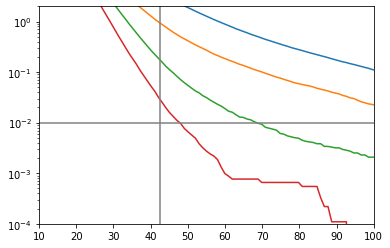

In [31]:
plt.Figure()
plt.plot(rate_j0_cent0[0], rate_j0_cent0[1])
plt.plot(rate_j1_cent0[0], rate_j1_cent0[1])
plt.plot(rate_j2_cent0[0], rate_j2_cent0[1])
plt.plot(rate_j3_cent0[0], rate_j3_cent0[1])
plt.plot([10,200], [1e-2,1e-2], color='gray')
fx = 42.5
plt.plot([fx,fx], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(10,100)
plt.ylim(1e-4,2)
plt.show()

In [32]:
rate_j0_cent1 = calc_eff( (jz0_4jets[0].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 0) )

rate_j1_cent1 = calc_eff( (jz0_4jets[1].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 0) )

rate_j2_cent1 = calc_eff( (jz0_4jets[2].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 0) )

rate_j3_cent1 = calc_eff( (jz0_4jets[3].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 0) )

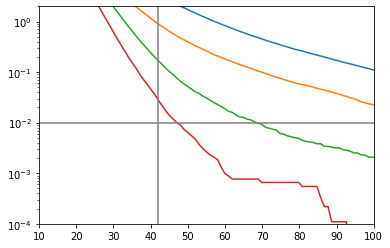

In [33]:
plt.Figure()
plt.plot(rate_j0_cent1[0], rate_j0_cent1[1])
plt.plot(rate_j1_cent1[0], rate_j1_cent1[1])
plt.plot(rate_j2_cent1[0], rate_j2_cent1[1])
plt.plot(rate_j3_cent1[0], rate_j3_cent1[1])
plt.plot([10,200], [1e-2,1e-2], color='gray')
fx = 42.
plt.plot([fx,fx], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(10,100)
plt.ylim(1e-4,2)
plt.show()

In [34]:
rate_j0_cent2 = calc_eff( (jz0_4jets[0].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 1) )

rate_j1_cent2 = calc_eff( (jz0_4jets[1].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 1) )

rate_j2_cent2 = calc_eff( (jz0_4jets[2].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 1) )

rate_j3_cent2 = calc_eff( (jz0_4jets[3].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 1) )

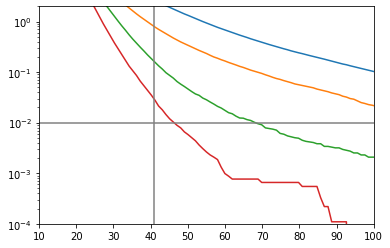

In [35]:
plt.Figure()
plt.plot(rate_j0_cent2[0], rate_j0_cent2[1])
plt.plot(rate_j1_cent2[0], rate_j1_cent2[1])
plt.plot(rate_j2_cent2[0], rate_j2_cent2[1])
plt.plot(rate_j3_cent2[0], rate_j3_cent2[1])
plt.plot([10,200], [1e-2,1e-2], color='gray')
fx = 41.
plt.plot([fx,fx], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(10,100)
plt.ylim(1e-4,2)
plt.show()

In [36]:
rate_j0_cent3 = calc_eff( (jz0_4jets[0].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 2) )

rate_j1_cent3 = calc_eff( (jz0_4jets[1].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 2) )

rate_j2_cent3 = calc_eff( (jz0_4jets[2].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 2) )

rate_j3_cent3 = calc_eff( (jz0_4jets[3].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 2) )

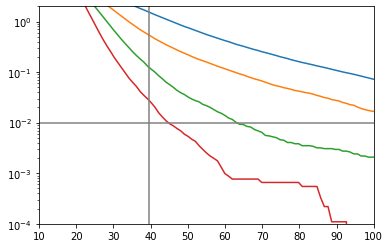

In [37]:
plt.Figure()
plt.plot(rate_j0_cent3[0], rate_j0_cent3[1])
plt.plot(rate_j1_cent3[0], rate_j1_cent3[1])
plt.plot(rate_j2_cent3[0], rate_j2_cent3[1])
plt.plot(rate_j3_cent3[0], rate_j3_cent3[1])
plt.plot([10,200], [1e-2,1e-2], color='gray')
fx = 39.5
plt.plot([fx,fx], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(10,100)
plt.ylim(1e-4,2)
plt.show()

In [38]:
rate_j0_cent4 = calc_eff( (jz0_4jets[0].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 3) )

rate_j1_cent4 = calc_eff( (jz0_4jets[1].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 3) )

rate_j2_cent4 = calc_eff( (jz0_4jets[2].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 3) )

rate_j3_cent4 = calc_eff( (jz0_4jets[3].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 3) )

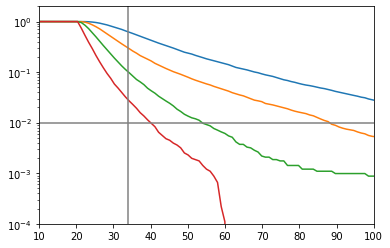

In [39]:
plt.Figure()
plt.plot(rate_j0_cent4[0], rate_j0_cent4[1])
plt.plot(rate_j1_cent4[0], rate_j1_cent4[1])
plt.plot(rate_j2_cent4[0], rate_j2_cent4[1])
plt.plot(rate_j3_cent4[0], rate_j3_cent4[1])
plt.plot([10,200], [1e-2,1e-2], color='gray')
fx = 34
plt.plot([fx,fx], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(10,100)
plt.ylim(1e-4,2)
plt.show()

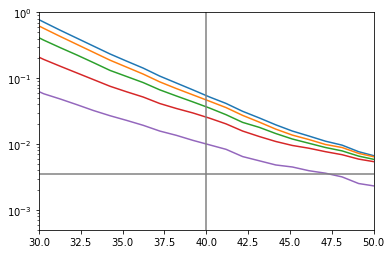

In [40]:
plt.Figure()
plt.plot(rate_j3_cent0[0], rate_j3_cent0[1], label='JZ0')
plt.plot(rate_j3_cent1[0], rate_j3_cent1[1], label='JZ0, NCentJ > 0')
plt.plot(rate_j3_cent2[0], rate_j3_cent2[1], label='JZ0, NCentJ > 1')
plt.plot(rate_j3_cent3[0], rate_j3_cent3[1], label='JZ0, NCentJ > 2')
plt.plot(rate_j3_cent4[0], rate_j3_cent4[1], label='JZ0, NCentJ > 3')
plt.plot([10,200], [3.5e-3,3.5e-3], color='gray')
fx = 40
plt.plot([fx,fx], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(30,50)
plt.ylim(5e-4,1)
plt.show()

In [41]:
rate_j3_cent4 = calc_eff( (jz0_4jets[3].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('jz0', minjetpt, 3) )

rate_hh_j3_cent4 = calc_eff( (hh_4jets[3].pt), bins=1000, range=(10, 1000), 
    sel=sel_base('hh', minjetpt, 3), is_sig=True )

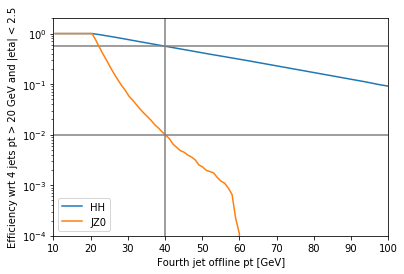

In [42]:
plt.Figure()
plt.plot(rate_hh_j3_cent4[0], rate_hh_j3_cent4[1], label='HH')
fy = 0.56
plt.plot([10,200], [fy,fy], color='gray')

plt.plot(rate_j3_cent4[0], rate_j3_cent4[1], label='JZ0')
fy = 1e-2
plt.plot([10,200], [fy,fy], color='gray')
fx = 40
plt.plot([fx,fx], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(10,100)
plt.ylim(1e-4,2)
plt.legend()
plt.ylabel('Efficiency wrt 4 jets pt > 20 GeV and |eta| < 2.5')
plt.xlabel('Fourth jet offline pt [GeV]')
plt.savefig("qcd_hh_eff_4th_jet.pdf")
plt.show()

In [43]:
rate_ht_cent0 = calc_eff( (jz0_ht), bins=1000, range=(0, 1000), 
    sel=sel_base('jz0', minjetpt, -1) )

rate_ht_cent1 = calc_eff( (jz0_ht), bins=1000, range=(0, 1000), 
    sel=sel_base('jz0', minjetpt, 0) )

rate_ht_cent2 = calc_eff( (jz0_ht), bins=1000, range=(0, 1000), 
    sel=sel_base('jz0', minjetpt, 1) )

rate_ht_cent3 = calc_eff( (jz0_ht), bins=1000, range=(0, 1000), 
    sel=sel_base('jz0', minjetpt, 2) )

rate_ht_cent4 = calc_eff( (jz0_ht), bins=1000, range=(0, 1000), 
    sel=sel_base('jz0', minjetpt, 3) )

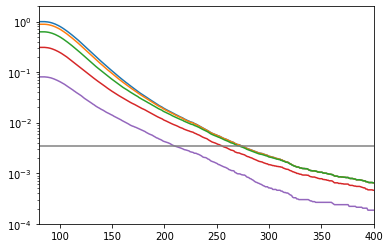

In [44]:
plt.Figure()
plt.plot(rate_ht_cent0[0], rate_ht_cent0[1], label='JZ0')
plt.plot(rate_ht_cent1[0], rate_ht_cent1[1], label='JZ0, NCentJ > 0')
plt.plot(rate_ht_cent2[0], rate_ht_cent2[1], label='JZ0, NCentJ > 1')
plt.plot(rate_ht_cent3[0], rate_ht_cent3[1], label='JZ0, NCentJ > 2')
plt.plot(rate_ht_cent4[0], rate_ht_cent4[1], label='JZ0, NCentJ > 3')
plt.plot([80,400], [3.5e-3,3.5e-3], color='gray')
plt.plot([40,40], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(80,400)
plt.ylim(1e-4,2)
plt.show()

In [60]:
rate_hh_ht_cent4 = calc_eff( (hh_ht), bins=1000, range=(0, 1000), 
    sel=sel_base('hh', minjetpt, 3), is_sig=True )

rate_ht_cent4 = calc_eff( (jz0_ht), bins=1000, range=(0, 1000), 
    sel=sel_base('jz0', minjetpt, 3) )

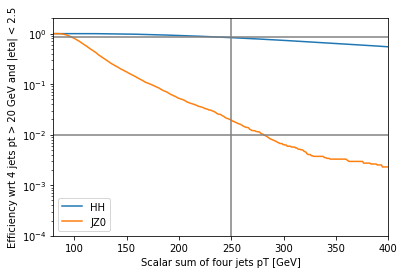

In [88]:
plt.Figure()
plt.plot(rate_hh_ht_cent4[0], rate_hh_ht_cent4[1], label='HH')
plt.plot(rate_ht_cent4[0], rate_ht_cent4[1], label='JZ0')
fy = 0.85
plt.plot([80,400], [fy,fy], color='gray')
plt.plot([80,400], [1e-2,1e-2], color='gray')
fx = 250
plt.plot([fx,fx], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(80,400)
plt.ylim(1e-4,2)
plt.ylabel('Efficiency wrt 4 jets pt > 20 GeV and |eta| < 2.5')
plt.xlabel('Scalar sum of four jets pT [GeV]')
plt.legend()
plt.savefig("qcd_hh_eff_HT.pdf")
plt.show()

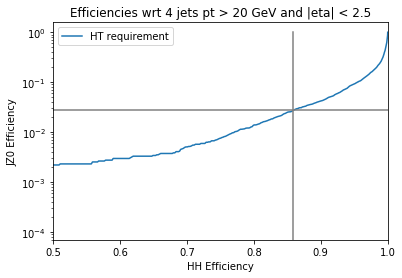

In [81]:
plt.Figure()
plt.plot(rate_hh_ht_cent4[1], rate_ht_cent4[1], label='HT requirement')

# fy = 0.50
# plt.plot([80,400], [fy,fy], color='gray')
# plt.plot([80,400], [8e-4,8e-4], color='gray')
# fx = 280
plt.plot([0,1], [0.028,0.028], color='gray')
plt.plot([0.859,0.859], [0,1], color='gray')
plt.yscale('log')
plt.xlim(0.5,1)
# plt.ylim(1e-4,2)
plt.title('Efficiencies wrt 4 jets pt > 20 GeV and |eta| < 2.5')
plt.ylabel('JZ0 Efficiency')
plt.xlabel('HH Efficiency')
plt.legend()
# plt.savefig("qcd_vs_hh_eff_HT.pdf")
plt.show()

In [82]:
base_size = hh_4j.mass[sel_base('hh', 20, 3) ].size
run2_size = hh_4j.mass[sel_base('hh', 40, 3) ].size
ht_size = hh_4j.mass[(sel_base('hh', 20, 3)) & (hh_ht > 250) ].size
asym_size = hh_4j.mass[(sel_base('hh', 20, 3)) & (hh_4jets[2].pt > 28) & (hh_4jets[1].pt > 55) & (hh_4jets[0].pt > 80) ].size

print('base_size:', base_size, '\n',
     'run2_size:', run2_size, run2_size/base_size , '\n',
     'ht_size:', ht_size, ht_size/base_size , '\n',
     'asym_size:', asym_size, asym_size/base_size )

base_size: 56307 
 run2_size: 31204 0.5541762125490614 
 ht_size: 47873 0.8502140053634539 
 asym_size: 48369 0.8590228568384037


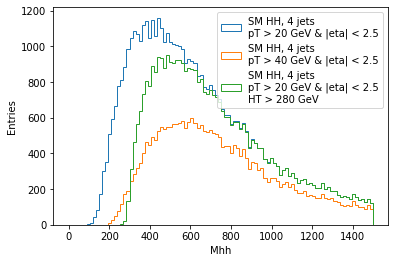

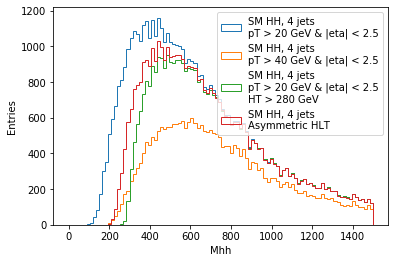

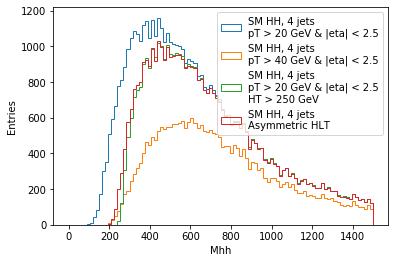

In [83]:
plt.Figure()
plt.hist(hh_4j.mass[sel_base('hh', 20, 3) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5')
plt.hist(hh_4j.mass[sel_base('hh', 40, 3) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \npT > 40 GeV & |eta| < 2.5')
plt.hist(hh_4j.mass[(sel_base('hh', 20, 3)) & (hh_ht > 280) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 280 GeV')
# plt.hist(hh_4j.mass[(sel_base('hh', 20, 3)) & (hh_4jets[2].pt > 28) & (hh_4jets[1].pt > 55) & (hh_4jets[0].pt > 80) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \nAsymmetric HLT')
plt.legend()
plt.ylabel('Entries')
plt.xlabel('Mhh')
plt.savefig('mhh.pdf')
plt.show()


plt.Figure()
plt.hist(hh_4j.mass[sel_base('hh', 20, 3) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5')
plt.hist(hh_4j.mass[sel_base('hh', 40, 3) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \npT > 40 GeV & |eta| < 2.5')
plt.hist(hh_4j.mass[(sel_base('hh', 20, 3)) & (hh_ht > 280) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 280 GeV')
plt.hist(hh_4j.mass[(sel_base('hh', 20, 3)) & (hh_4jets[2].pt > 28) & (hh_4jets[1].pt > 55) & (hh_4jets[0].pt > 80) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \nAsymmetric HLT')
plt.legend()
plt.ylabel('Entries')
plt.xlabel('Mhh')
plt.savefig('mhh_asym.pdf')
plt.show()

plt.Figure()
plt.hist(hh_4j.mass[sel_base('hh', 20, 3) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5')
plt.hist(hh_4j.mass[sel_base('hh', 40, 3) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \npT > 40 GeV & |eta| < 2.5')
plt.hist(hh_4j.mass[(sel_base('hh', 20, 3)) & (hh_ht > 250) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 250 GeV')
plt.hist(hh_4j.mass[(sel_base('hh', 20, 3)) & (hh_4jets[2].pt > 28) & (hh_4jets[1].pt > 55) & (hh_4jets[0].pt > 80) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, 4 jets \nAsymmetric HLT')
plt.legend()
plt.ylabel('Entries')
plt.xlabel('Mhh')
plt.savefig('mhh_asym_rmatch.pdf')
plt.show()

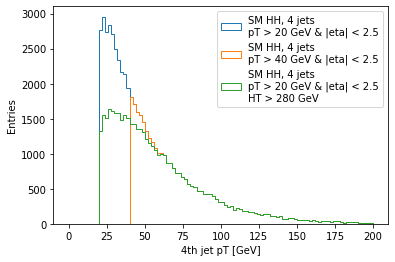

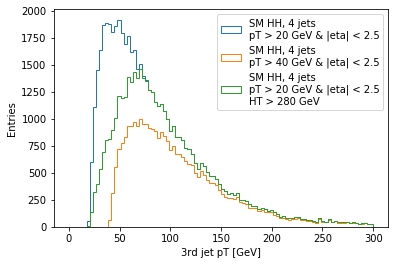

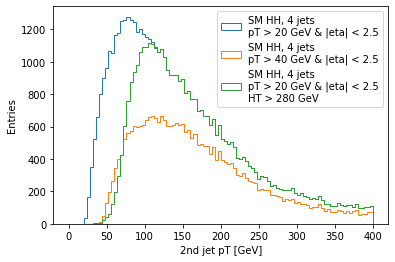

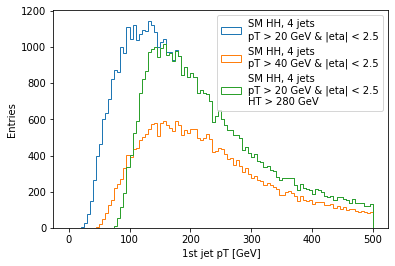

In [84]:
plt.Figure()
plt.hist(hh_4jets[3].pt[sel_base('hh', 20, 3) ], histtype='step', bins=100, range=(0,200), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5')
plt.hist(hh_4jets[3].pt[sel_base('hh', 40, 3) ], histtype='step', bins=100, range=(0,200), density=0, label='SM HH, 4 jets \npT > 40 GeV & |eta| < 2.5')
plt.hist(hh_4jets[3].pt[(sel_base('hh', 20, 3)) & (hh_ht > 280) ], histtype='step', bins=100, range=(0,200), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 280 GeV')
plt.legend()
plt.ylabel('Entries')
plt.xlabel('4th jet pT [GeV]')
plt.savefig('hh_pt4th.pdf')
plt.show()


plt.Figure()
plt.hist(hh_4jets[2].pt[sel_base('hh', 20, 3) ], histtype='step', bins=100, range=(0,300), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5')
plt.hist(hh_4jets[2].pt[sel_base('hh', 40, 3) ], histtype='step', bins=100, range=(0,300), density=0, label='SM HH, 4 jets \npT > 40 GeV & |eta| < 2.5')
plt.hist(hh_4jets[2].pt[(sel_base('hh', 20, 3)) & (hh_ht > 280) ], histtype='step', bins=100, range=(0,300), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 280 GeV')
plt.legend()
plt.ylabel('Entries')
plt.xlabel('3rd jet pT [GeV]')
plt.savefig('hh_pt3rd.pdf')
plt.show()

plt.Figure()
plt.hist(hh_4jets[1].pt[sel_base('hh', 20, 3) ], histtype='step', bins=100, range=(0,400), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5')
plt.hist(hh_4jets[1].pt[sel_base('hh', 40, 3) ], histtype='step', bins=100, range=(0,400), density=0, label='SM HH, 4 jets \npT > 40 GeV & |eta| < 2.5')
plt.hist(hh_4jets[1].pt[(sel_base('hh', 20, 3)) & (hh_ht > 280) ], histtype='step', bins=100, range=(0,400), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 280 GeV')
plt.legend()
plt.ylabel('Entries')
plt.xlabel('2nd jet pT [GeV]')
plt.savefig('hh_pt2nd.pdf')
plt.show()

plt.Figure()
plt.hist(hh_4jets[0].pt[sel_base('hh', 20, 3) ], histtype='step', bins=100, range=(0,500), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5')
plt.hist(hh_4jets[0].pt[sel_base('hh', 40, 3) ], histtype='step', bins=100, range=(0,500), density=0, label='SM HH, 4 jets \npT > 40 GeV & |eta| < 2.5')
plt.hist(hh_4jets[0].pt[(sel_base('hh', 20, 3)) & (hh_ht > 280) ], histtype='step', bins=100, range=(0,500), density=0, label='SM HH, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 280 GeV')
plt.legend()
plt.ylabel('Entries')
plt.xlabel('1st jet pT [GeV]')
plt.savefig('hh_pt1st.pdf')
plt.show()

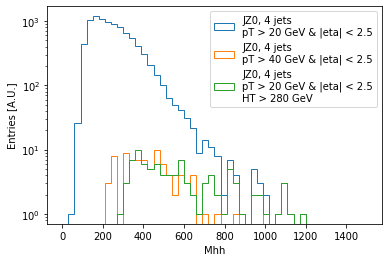

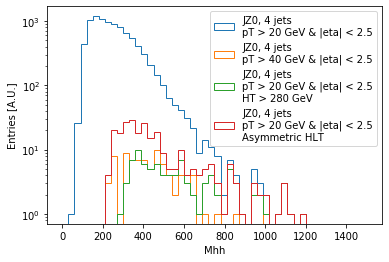

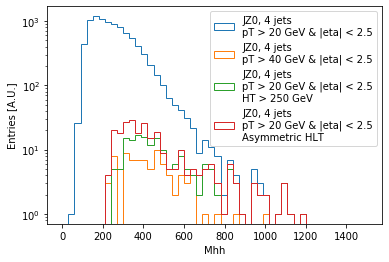

base_size: 9125.0 
 run2_size: 83.0 0.009095890410958905 
 ht_size: 175.0 0.019178082191780823 
 asym_size: 256.0 0.028054794520547946


In [86]:
plt.Figure()
this_sel = sel_base('jz0', 20, 3)
base_qcd = plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 20 GeV & |eta| < 2.5')
this_sel = sel_base('jz0', 40, 3)
run2_qcd = plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 40 GeV & |eta| < 2.5')
this_sel = (sel_base('jz0', 20, 3)) & (jz0_ht > 280)
plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 280 GeV')

plt.legend()
plt.ylabel('Entries [A.U.]')
plt.xlabel('Mhh')
plt.yscale('log')
plt.savefig('mhh_jz0.pdf')
plt.show()



plt.Figure()
this_sel = sel_base('jz0', 20, 3)
plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 20 GeV & |eta| < 2.5')
this_sel = sel_base('jz0', 40, 3)
plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 40 GeV & |eta| < 2.5')
this_sel = (sel_base('jz0', 20, 3)) & (jz0_ht > 280)
plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 280 GeV')
this_sel = (sel_base('jz0', 20, 3)) & (jz0_4jets[2].pt > 28) & (jz0_4jets[1].pt > 55) & (jz0_4jets[0].pt > 80)
asym_qcd = plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 20 GeV & |eta| < 2.5\nAsymmetric HLT')

plt.legend()
plt.ylabel('Entries [A.U.]')
plt.xlabel('Mhh')
plt.yscale('log')
plt.savefig('mhh_jz0_asym.pdf')
plt.show()



plt.Figure()
this_sel = sel_base('jz0', 20, 3)
plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 20 GeV & |eta| < 2.5')
this_sel = sel_base('jz0', 40, 3)
plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 40 GeV & |eta| < 2.5')
this_sel = (sel_base('jz0', 20, 3)) & (jz0_ht > 250)
ht_qcd = plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 20 GeV & |eta| < 2.5\nHT > 250 GeV')
this_sel = (sel_base('jz0', 20, 3)) & (jz0_4jets[2].pt > 28) & (jz0_4jets[1].pt > 55) & (jz0_4jets[0].pt > 80)
plt.hist(jz0_4j.mass[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,1500), density=0, label='JZ0, 4 jets \npT > 20 GeV & |eta| < 2.5\nAsymmetric HLT')

plt.legend()
plt.ylabel('Entries [A.U.]')
plt.xlabel('Mhh')
plt.yscale('log')
plt.savefig('mhh_jz0_asym_rmatch.pdf')
plt.show()



tot_base_qcd = base_qcd[0].sum()
tot_run2_qcd = run2_qcd[0].sum()
tot_ht_qcd = ht_qcd[0].sum()
tot_asym_qcd = asym_qcd[0].sum()

print('base_size:', tot_base_qcd, '\n',
     'run2_size:', tot_run2_qcd, tot_run2_qcd/tot_base_qcd , '\n',
     'ht_size:', tot_ht_qcd, tot_ht_qcd/tot_base_qcd , '\n',
     'asym_size:', tot_asym_qcd, tot_asym_qcd/tot_base_qcd )

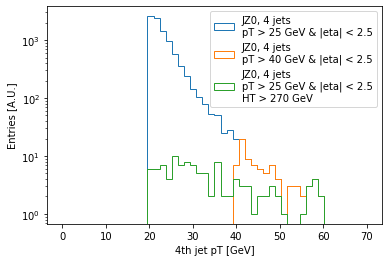

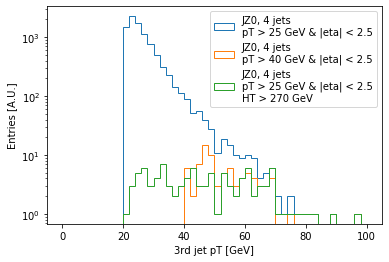

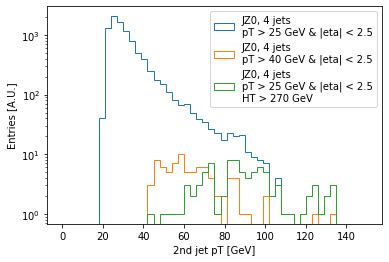

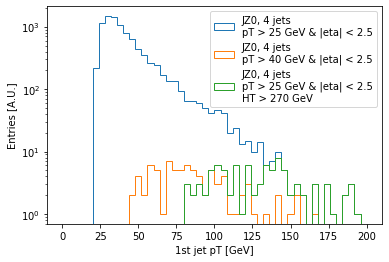

In [61]:
plt.Figure()
this_sel = sel_base('jz0', 20, 3)
plt.hist(jz0_4jets[3].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,70), density=0, label='JZ0, 4 jets \npT > 25 GeV & |eta| < 2.5')
this_sel = sel_base('jz0', 40, 3)
plt.hist(jz0_4jets[3].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,70), density=0, label='JZ0, 4 jets \npT > 40 GeV & |eta| < 2.5')
this_sel = (sel_base('jz0', 20, 3)) & (jz0_ht > 270)
plt.hist(jz0_4jets[3].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,70), density=0, label='JZ0, 4 jets \npT > 25 GeV & |eta| < 2.5\nHT > 270 GeV')
plt.legend()
plt.ylabel('Entries [A.U.]')
plt.xlabel('4th jet pT [GeV]')
plt.yscale('log')
plt.savefig('jz0_pt4th.pdf')
plt.show()

plt.Figure()
this_sel = sel_base('jz0', 20, 3)
plt.hist(jz0_4jets[2].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,100), density=0, label='JZ0, 4 jets \npT > 25 GeV & |eta| < 2.5')
this_sel = sel_base('jz0', 40, 3)
plt.hist(jz0_4jets[2].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,100), density=0, label='JZ0, 4 jets \npT > 40 GeV & |eta| < 2.5')
this_sel = (sel_base('jz0', 20, 3)) & (jz0_ht > 270)
plt.hist(jz0_4jets[2].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,100), density=0, label='JZ0, 4 jets \npT > 25 GeV & |eta| < 2.5\nHT > 270 GeV')
plt.legend()
plt.ylabel('Entries [A.U.]')
plt.xlabel('3rd jet pT [GeV]')
plt.yscale('log')
plt.savefig('jz0_pt3rd.pdf')
plt.show()

plt.Figure()
this_sel = sel_base('jz0', 20, 3)
plt.hist(jz0_4jets[1].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,150), density=0, label='JZ0, 4 jets \npT > 25 GeV & |eta| < 2.5')
this_sel = sel_base('jz0', 40, 3)
plt.hist(jz0_4jets[1].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,150), density=0, label='JZ0, 4 jets \npT > 40 GeV & |eta| < 2.5')
this_sel = (sel_base('jz0', 20, 3)) & (jz0_ht > 270)
plt.hist(jz0_4jets[1].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,150), density=0, label='JZ0, 4 jets \npT > 25 GeV & |eta| < 2.5\nHT > 270 GeV')
plt.legend()
plt.ylabel('Entries [A.U.]')
plt.xlabel('2nd jet pT [GeV]')
plt.yscale('log')
plt.savefig('jz0_pt2nd.pdf')
plt.show()

plt.Figure()
this_sel = sel_base('jz0', 20, 3)
plt.hist(jz0_4jets[0].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,200), density=0, label='JZ0, 4 jets \npT > 25 GeV & |eta| < 2.5')
this_sel = sel_base('jz0', 40, 3)
plt.hist(jz0_4jets[0].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,200), density=0, label='JZ0, 4 jets \npT > 40 GeV & |eta| < 2.5')
this_sel = (sel_base('jz0', 20, 3)) & (jz0_ht > 270)
plt.hist(jz0_4jets[0].pt[this_sel], weights=tjz0[b'mcwg'][this_sel], histtype='step', bins=50, range=(0,200), density=0, label='JZ0, 4 jets \npT > 25 GeV & |eta| < 2.5\nHT > 270 GeV')
plt.legend()
plt.ylabel('Entries [A.U.]')
plt.xlabel('1st jet pT [GeV]')
plt.yscale('log')
plt.savefig('jz0_pt1st.pdf')
plt.show()

In [247]:
rate_htm_cent0 = calc_eff( (jz0_ht/jz0_4j.mass), bins=1000, range=(0, 1.2), 
    sel=sel_base('jz0', 25, -1) )

rate_htm_cent1 = calc_eff( (jz0_ht/jz0_4j.mass), bins=1000, range=(0, 1.2), 
    sel=sel_base('jz0', 25, 0) )

rate_htm_cent2 = calc_eff( (jz0_ht/jz0_4j.mass), bins=1000, range=(0, 1.2), 
    sel=sel_base('jz0', 25, 1) )

rate_htm_cent3 = calc_eff( (jz0_ht/jz0_4j.mass), bins=1000, range=(0, 1.2), 
    sel=sel_base('jz0', 25, 2) )

rate_htm_cent4 = calc_eff( (jz0_ht/jz0_4j.mass), bins=1000, range=(0, 1.2), 
    sel=sel_base('jz0', 25, 3) )

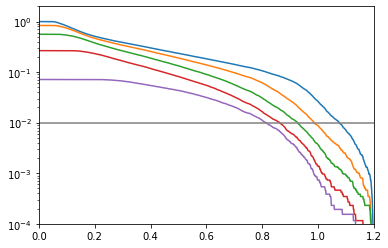

In [249]:
plt.Figure()
plt.plot(rate_htm_cent0[0], rate_htm_cent0[1], label='JZ0')
plt.plot(rate_htm_cent1[0], rate_htm_cent1[1], label='JZ0, NCentJ > 0')
plt.plot(rate_htm_cent2[0], rate_htm_cent2[1], label='JZ0, NCentJ > 1')
plt.plot(rate_htm_cent3[0], rate_htm_cent3[1], label='JZ0, NCentJ > 2')
plt.plot(rate_htm_cent4[0], rate_htm_cent4[1], label='JZ0, NCentJ > 3')
plt.plot([0,1.2], [1e-2,1e-2], color='gray')
plt.plot([40,40], [1e-4,2], color='gray')
plt.yscale('log')
plt.xlim(0,1.2)
plt.ylim(1e-4,2)
plt.show()

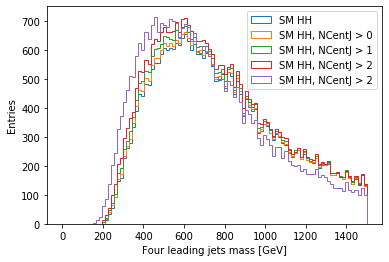

In [246]:
plt.Figure()

plt.hist(hh_4j.mass[sel_base('hh', 42.5, -1) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH')

plt.hist(hh_4j.mass[sel_base('hh', 42, 0) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 0')

plt.hist(hh_4j.mass[sel_base('hh', 41, 1) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 1')

plt.hist(hh_4j.mass[sel_base('hh', 39.5, 2) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 2')

plt.hist(hh_4j.mass[sel_base('hh', 34, 3) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 2')


plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()

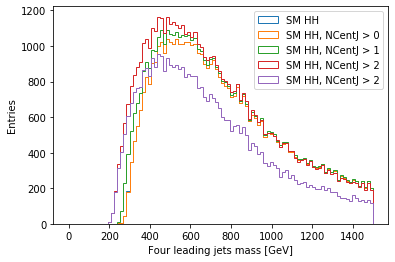

In [250]:
plt.Figure()

plt.hist(hh_4j.mass[sel_base('hh', 25, -1) & (hh_ht > 275)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH')

plt.hist(hh_4j.mass[sel_base('hh', 25, 0) & (hh_ht > 275)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 0')

plt.hist(hh_4j.mass[sel_base('hh', 25, 1) & (hh_ht > 255)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 1')

plt.hist(hh_4j.mass[sel_base('hh', 25, 2) & (hh_ht > 210)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 2')

plt.hist(hh_4j.mass[sel_base('hh', 25, 3) & (hh_ht > 210)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 2')

plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()

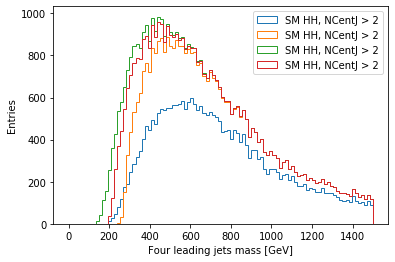

In [268]:
plt.Figure()

plt.hist(hh_4j.mass[sel_base('hh', 40, 3) ], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 2')

plt.hist(hh_4j.mass[sel_base('hh', 25, 3) & (hh_ht > 260)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 2')

plt.hist(hh_4j.mass[sel_base('hh', 25, 3) & (hh_4jets[0].pt > 45)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 2')

plt.hist(hh_4j.mass[sel_base('hh', 25, 3) & (hh_ht > 200)], histtype='step', bins=100, range=(0,1500), density=0, label='SM HH, NCentJ > 2')


plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()

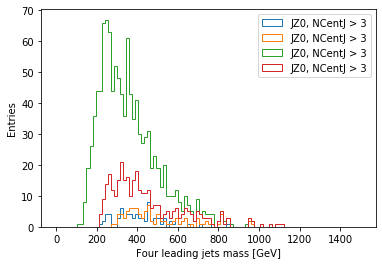

In [269]:
plt.Figure()

plt.hist(jz0_4j.mass[sel_base('jz0', 40, 3)], histtype='step', bins=100, range=(0,1500), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', 40, 3)], label='JZ0, NCentJ > 3')

plt.hist(jz0_4j.mass[sel_base('jz0', 25, 3) & (jz0_ht > 260)], histtype='step', bins=100, range=(0,1500), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', 25, 3) & (jz0_ht > 260)], label='JZ0, NCentJ > 3')

plt.hist(jz0_4j.mass[sel_base('jz0', 25, 3) & ((jz0_4jets[0].pt) > 45)], histtype='step', bins=100, range=(0,1500), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', 25, 3) & ((jz0_4jets[0].pt) > 45)], label='JZ0, NCentJ > 3')

plt.hist(jz0_4j.mass[sel_base('jz0', 25, 3) & (jz0_ht > 200)], histtype='step', bins=100, range=(0,1500), density=0, weights=tjz0[b'mcwg'][sel_base('jz0', 25, 3) & (jz0_ht > 200)], label='JZ0, NCentJ > 3')


plt.xlabel(r'Four leading jets mass [GeV]')
plt.ylabel('Entries')
plt.legend()
plt.show()